<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-эффективности" data-toc-modified-id="Расчёт-эффективности-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Расчёт эффективности</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

## Подготовка данных

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
print(df_train.isna().sum().sum())

4100


In [6]:
list_column = df_train.columns
list_column = list_column.drop('date')

In [7]:
for col in list_column:
    df_train[col] = df_train[col].fillna(df_train[col].median())

df_train['date'] = pd.to_datetime(df_train['date'], format='&Y-%m-%d %H:%M:%S')

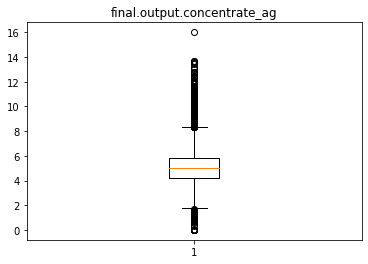

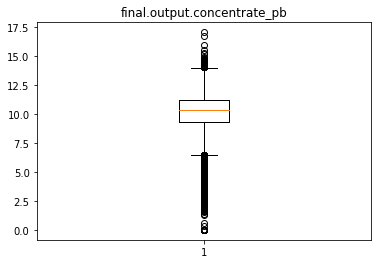

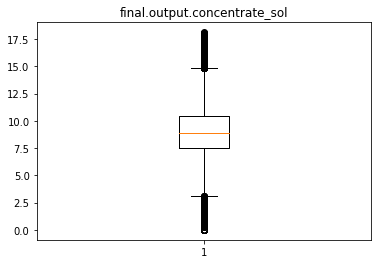

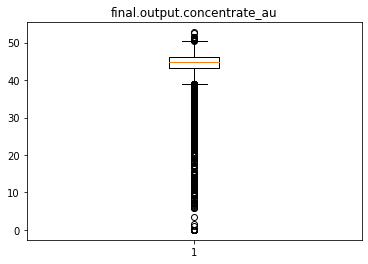

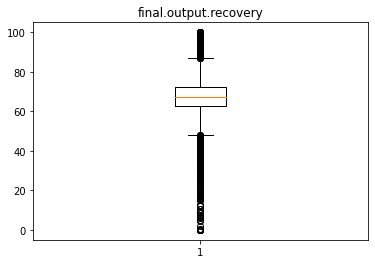

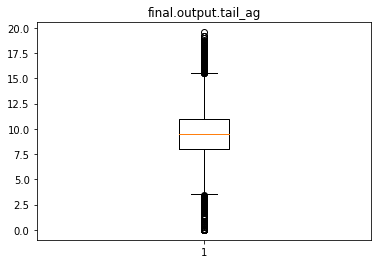

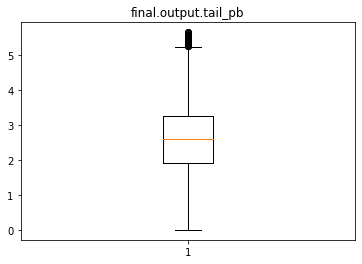

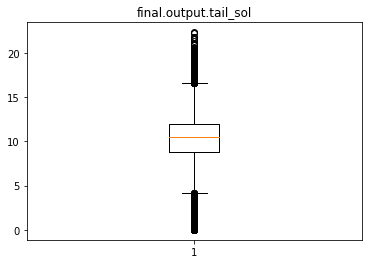

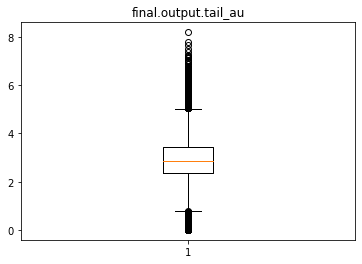

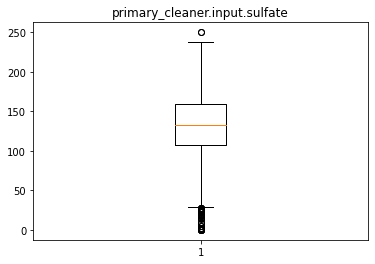

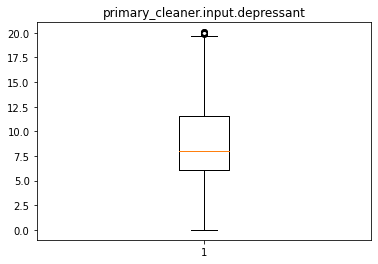

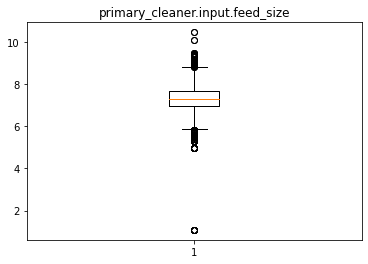

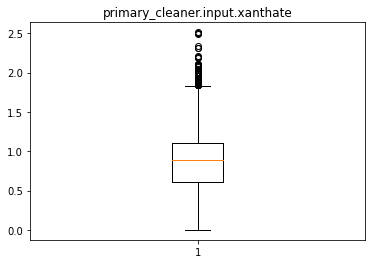

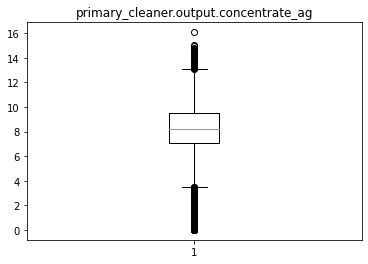

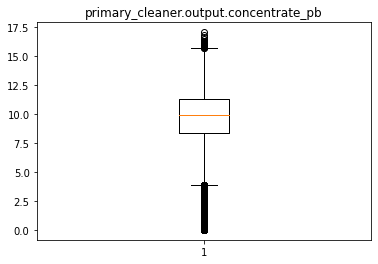

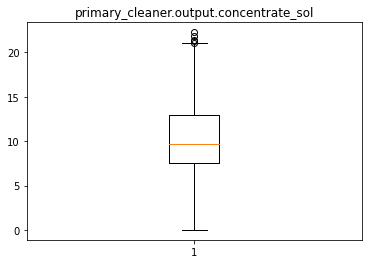

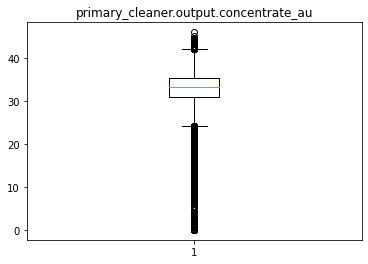

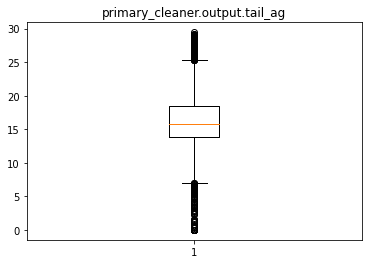

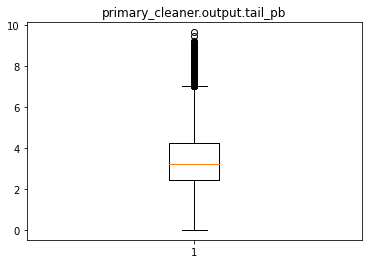

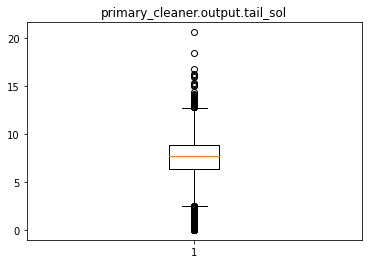

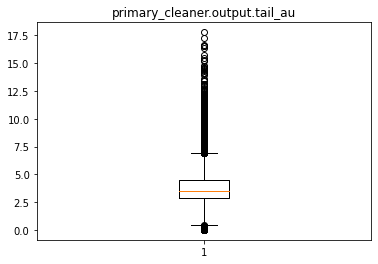

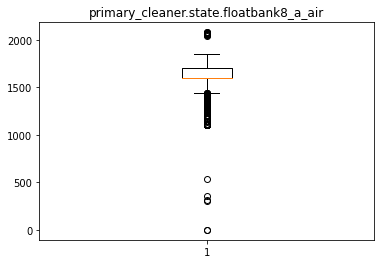

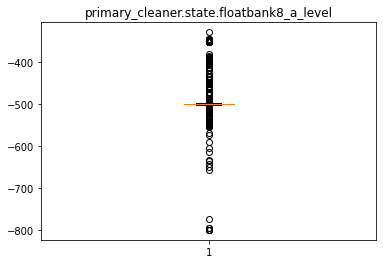

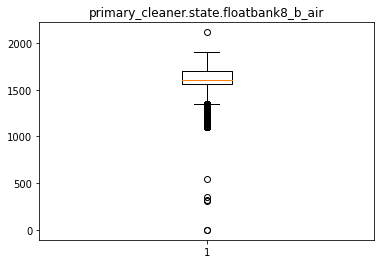

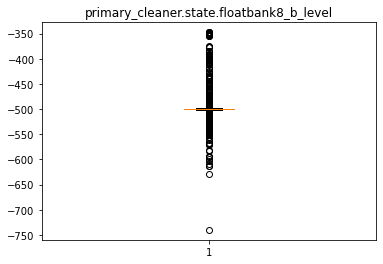

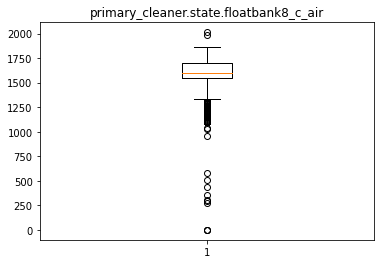

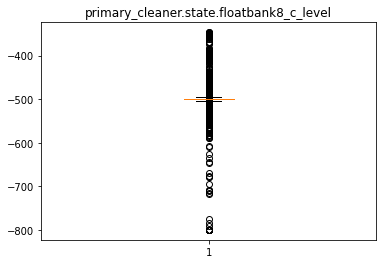

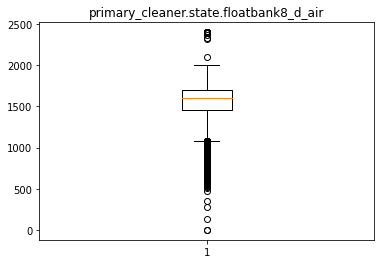

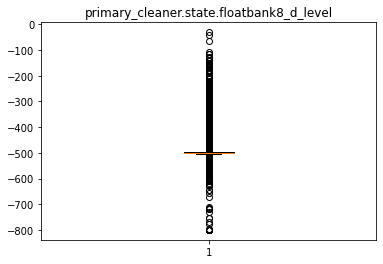

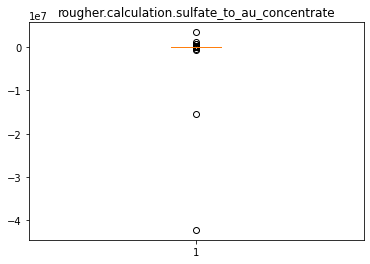

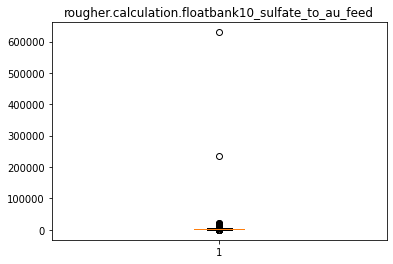

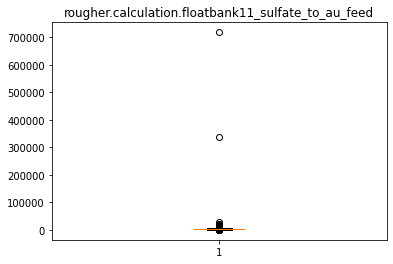

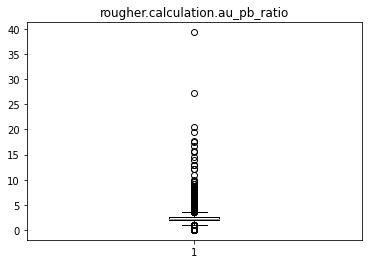

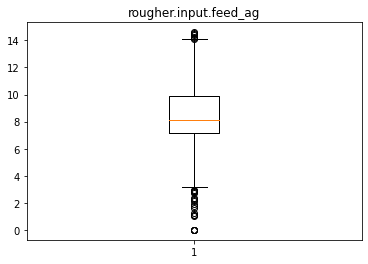

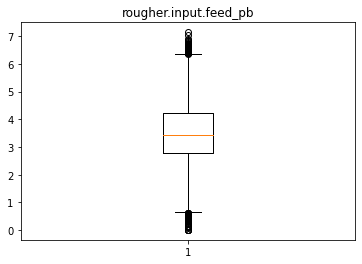

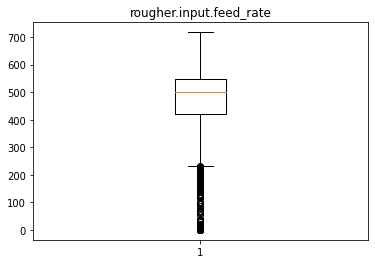

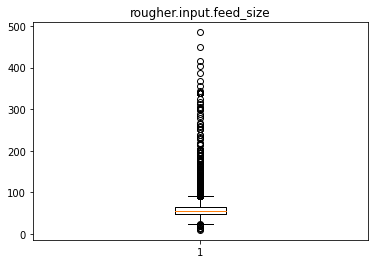

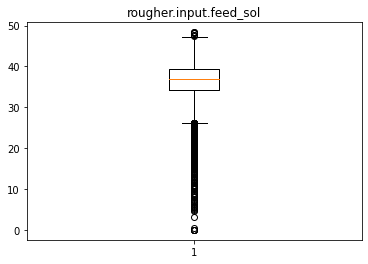

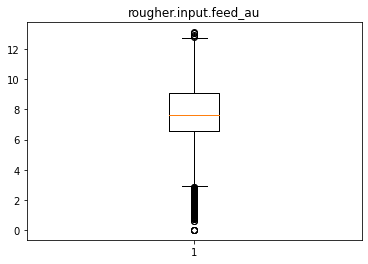

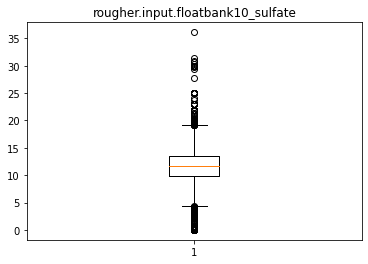

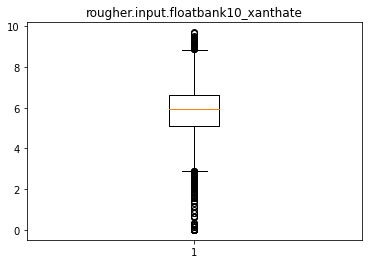

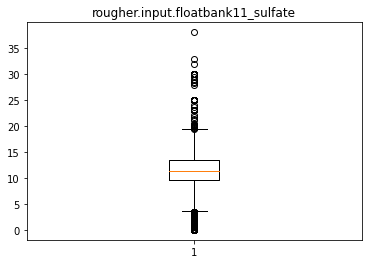

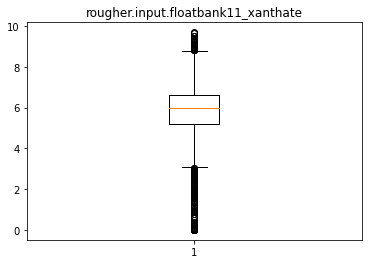

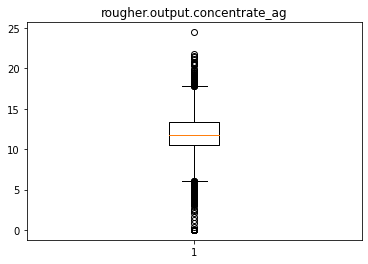

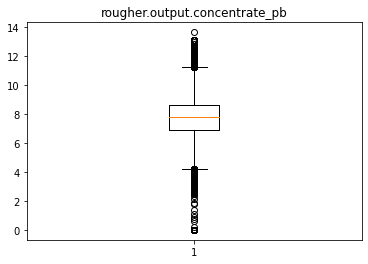

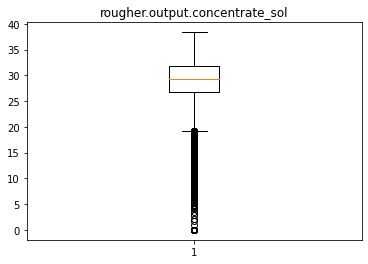

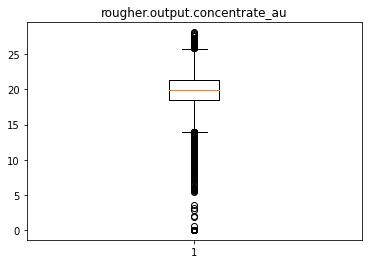

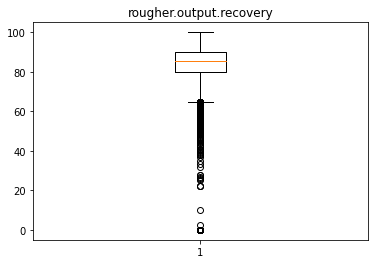

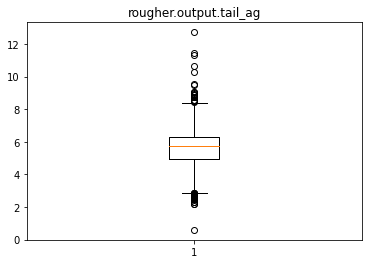

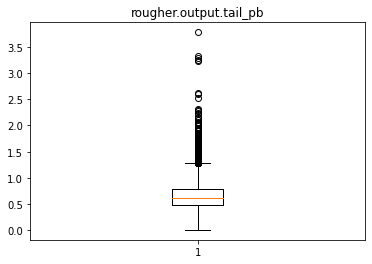

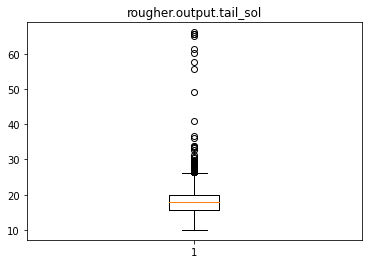

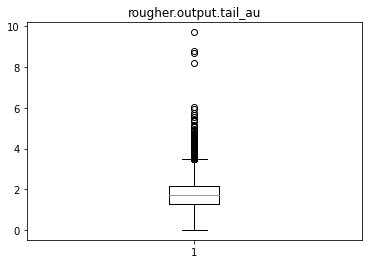

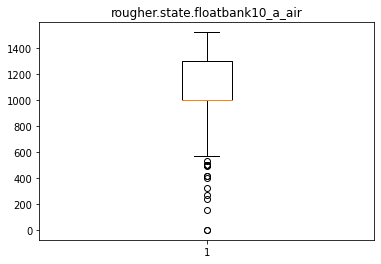

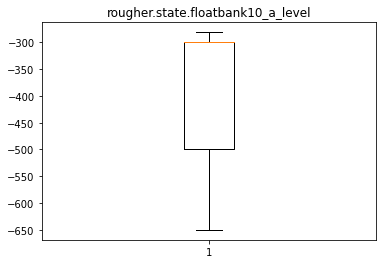

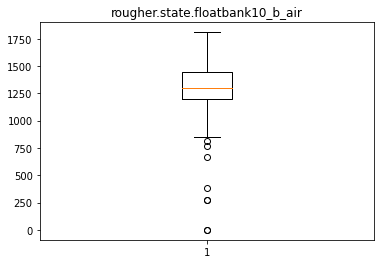

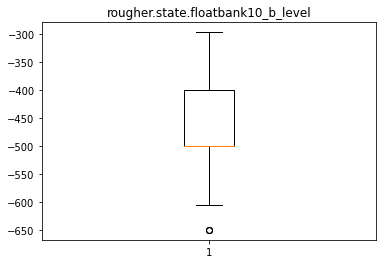

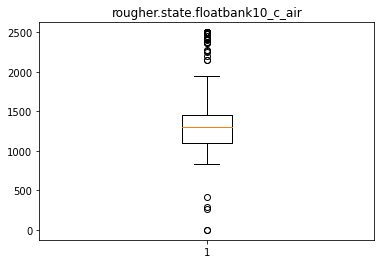

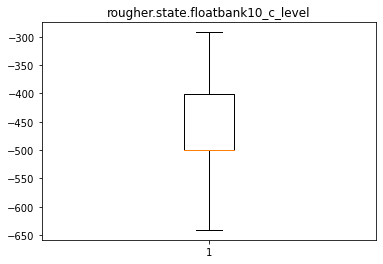

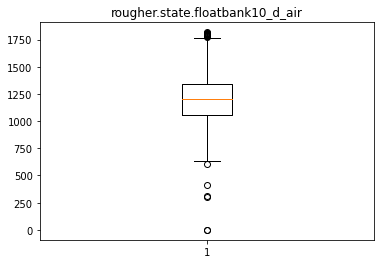

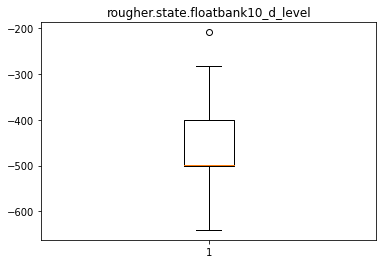

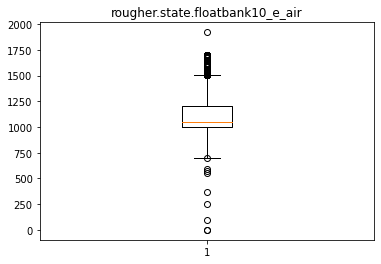

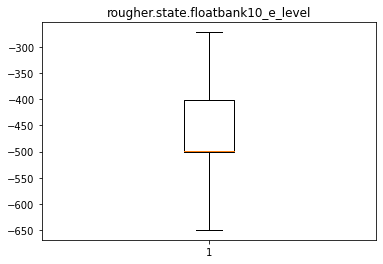

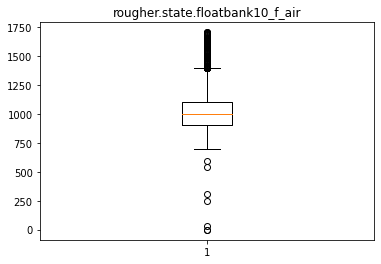

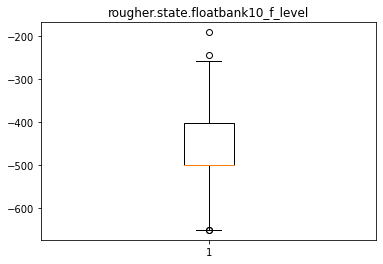

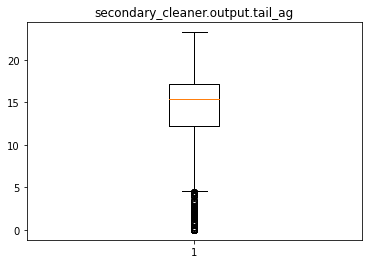

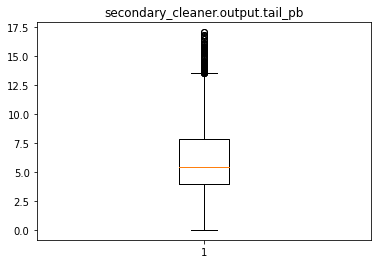

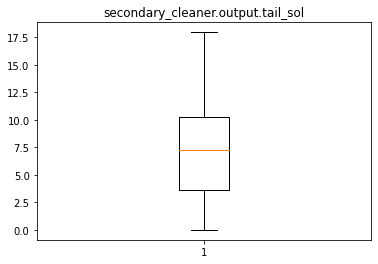

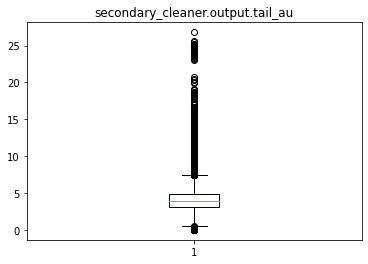

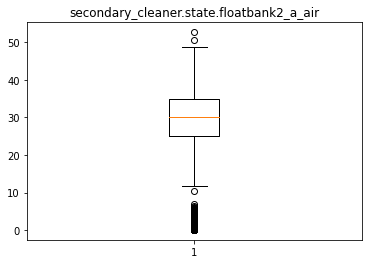

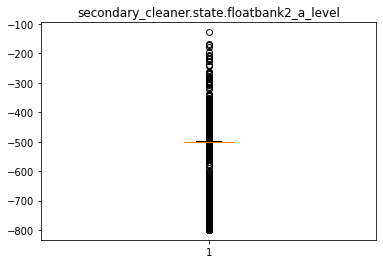

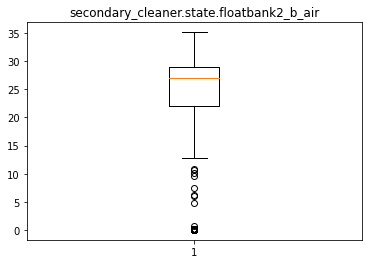

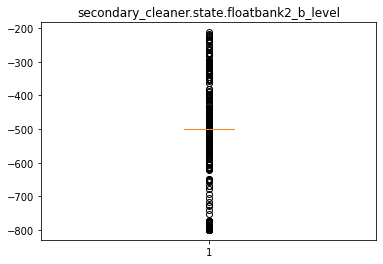

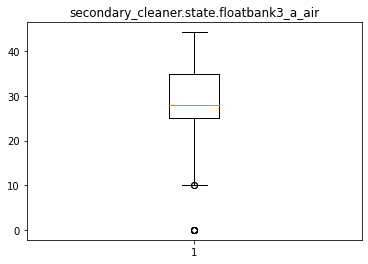

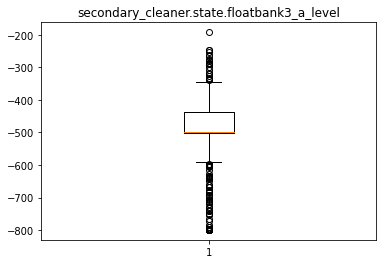

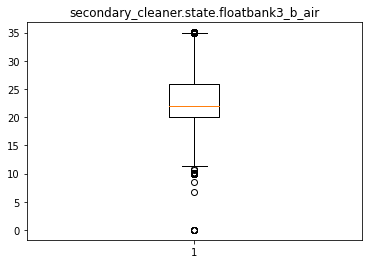

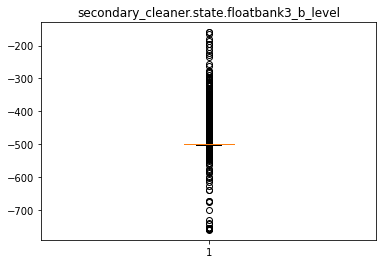

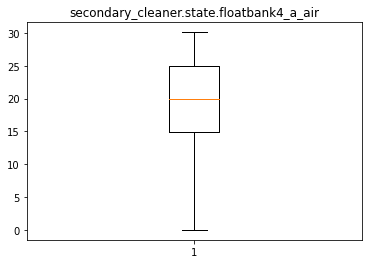

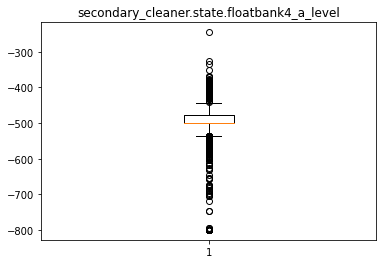

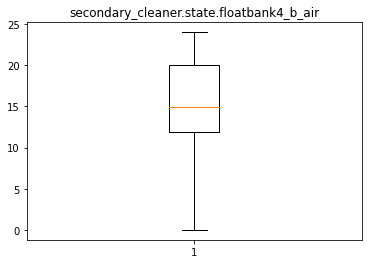

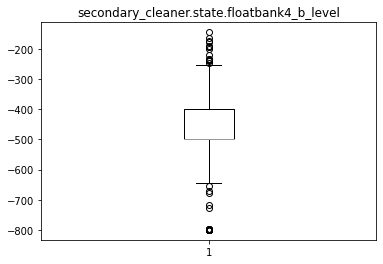

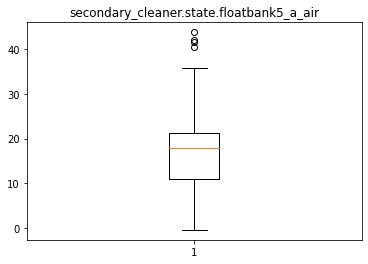

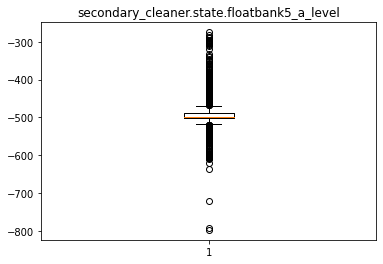

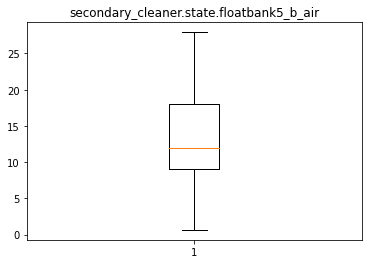

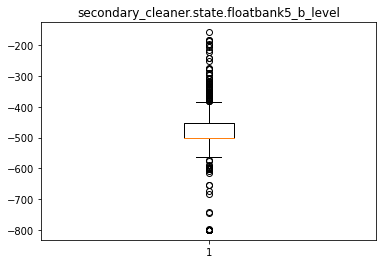

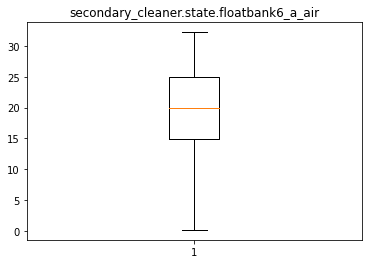

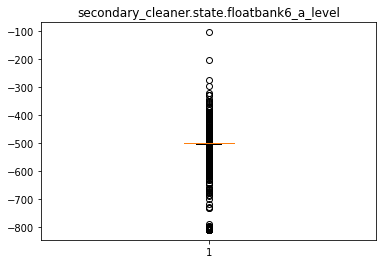

In [8]:
for col in list_column:
    plt.boxplot(df_train[col])
    plt.title(col)
    plt.show()

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [11]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [12]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [13]:
list_column = df_test.columns
list_column = list_column.drop('date')
for col in list_column:
    df_test[col] = df_test[col].fillna(df_test[col].median(skipna=True))

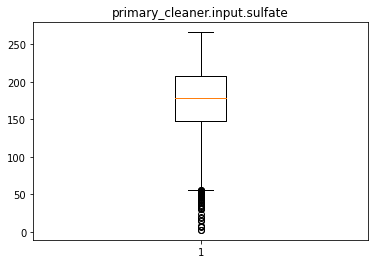

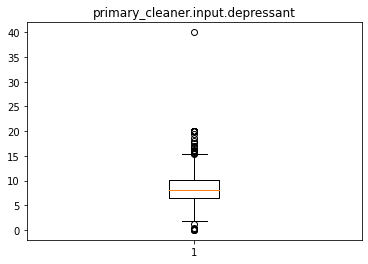

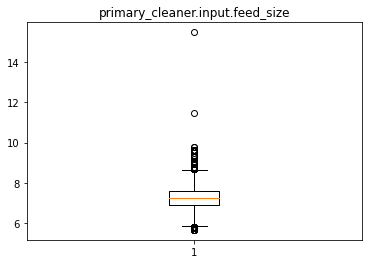

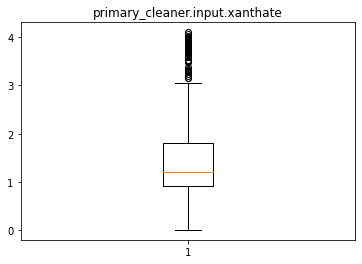

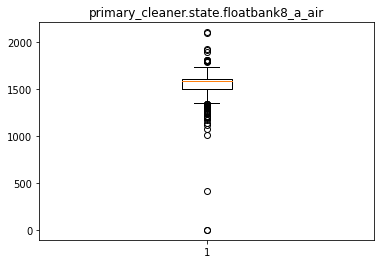

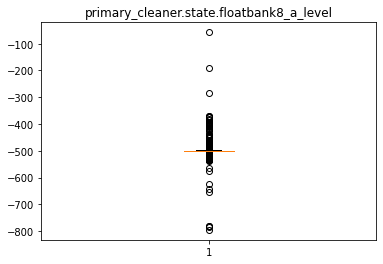

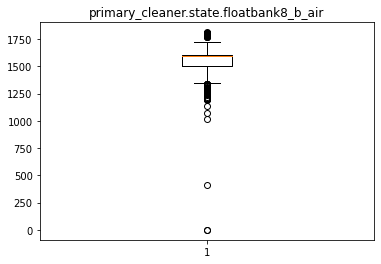

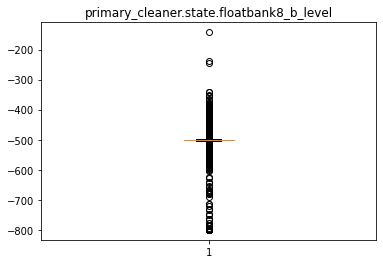

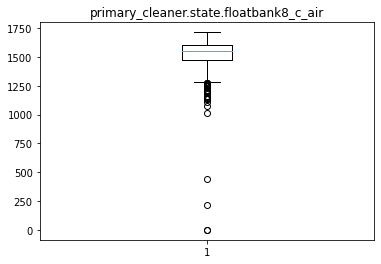

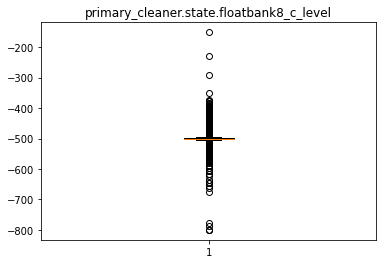

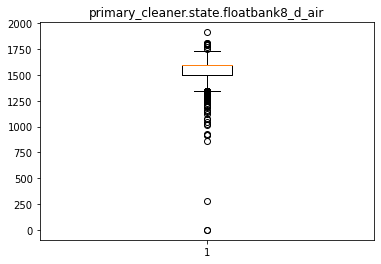

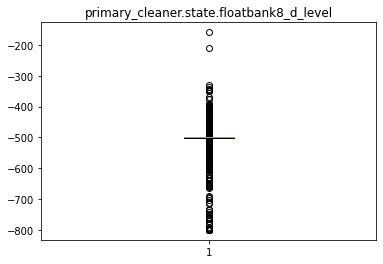

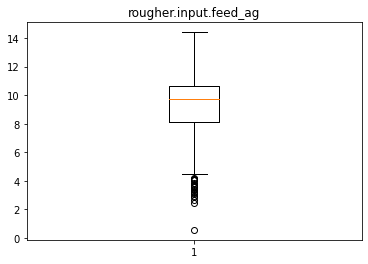

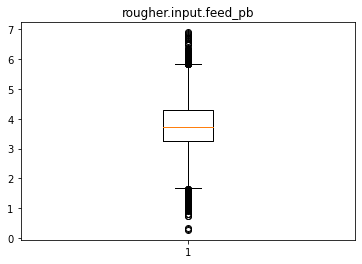

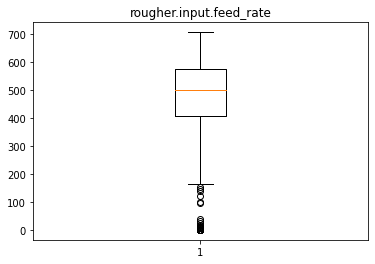

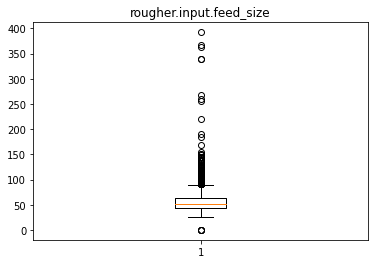

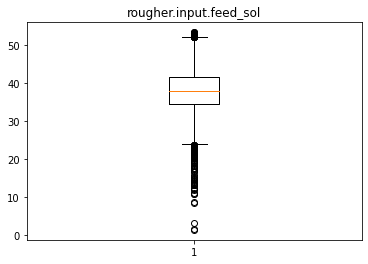

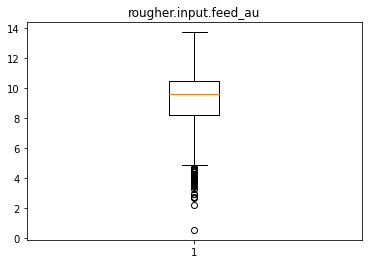

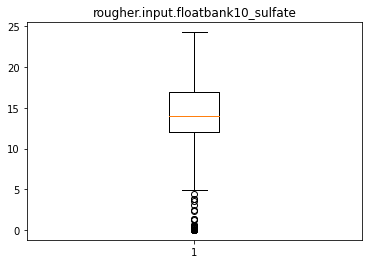

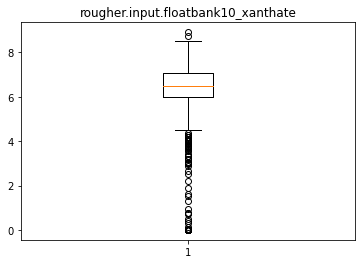

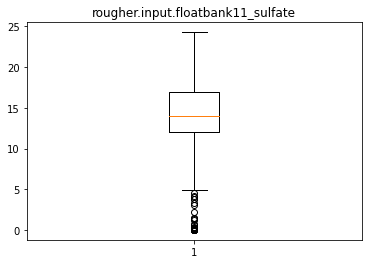

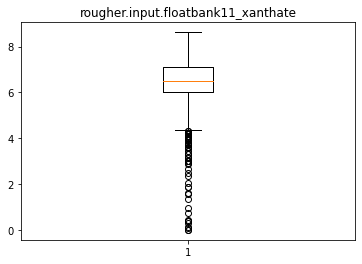

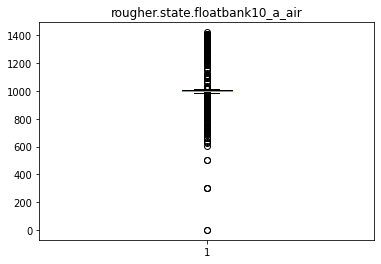

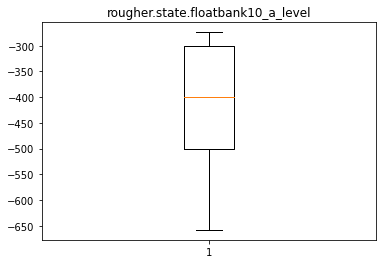

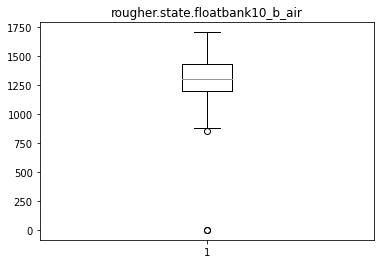

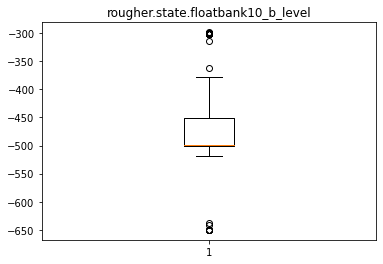

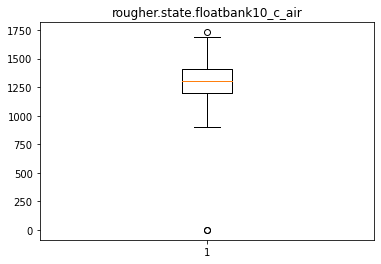

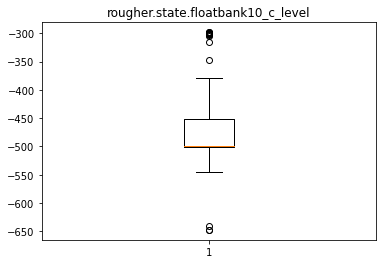

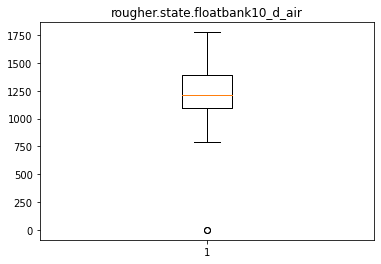

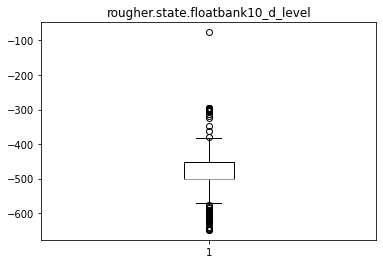

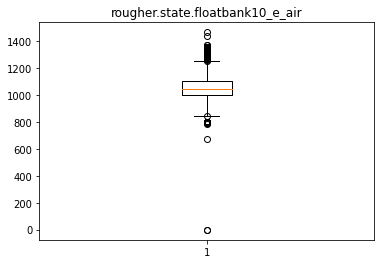

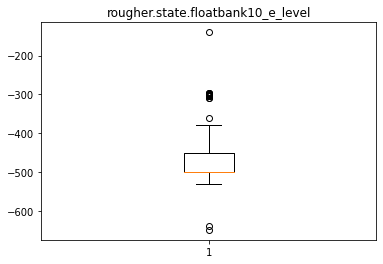

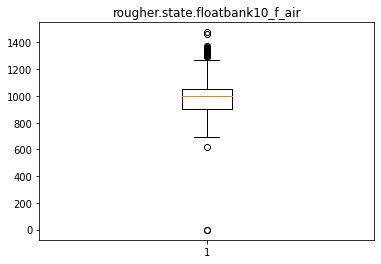

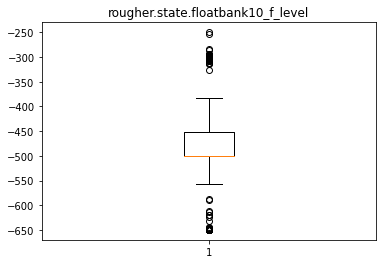

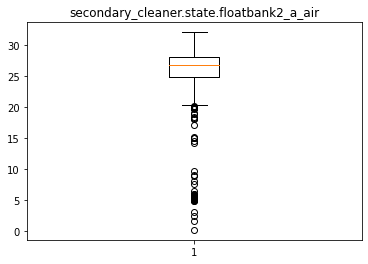

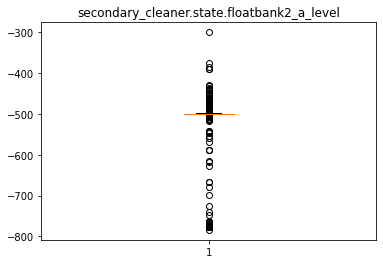

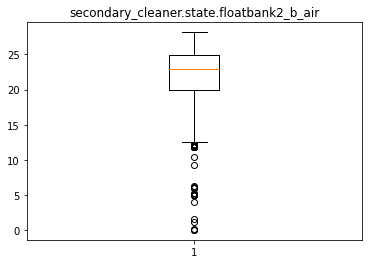

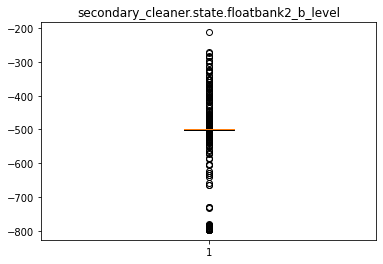

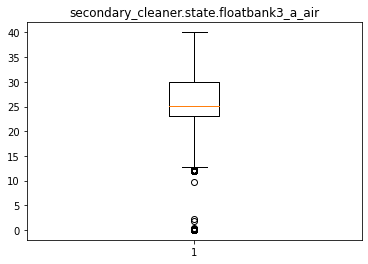

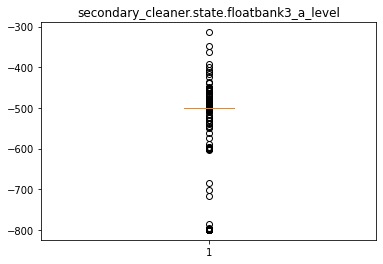

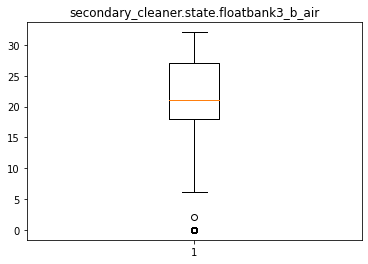

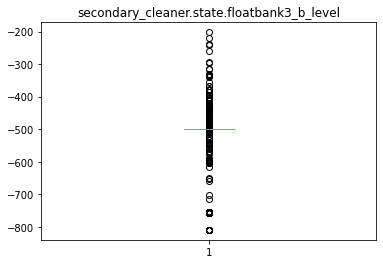

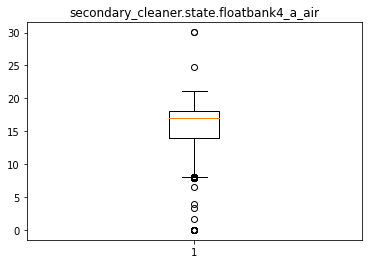

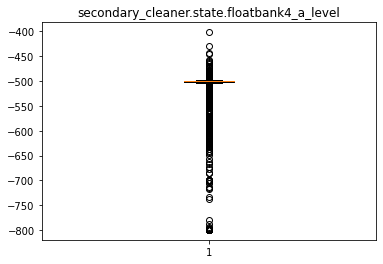

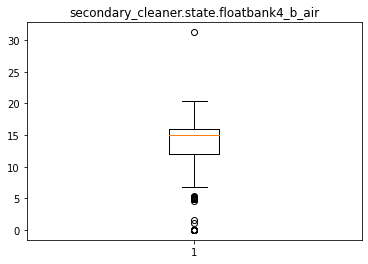

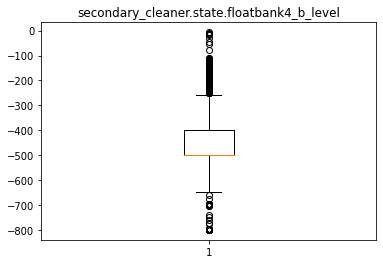

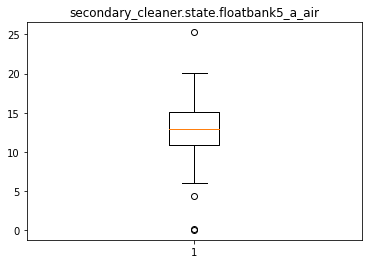

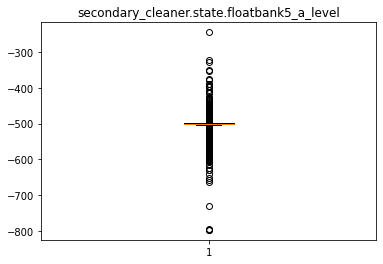

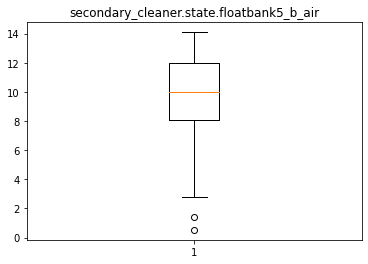

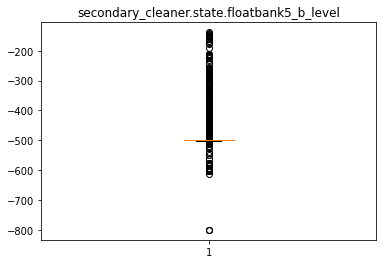

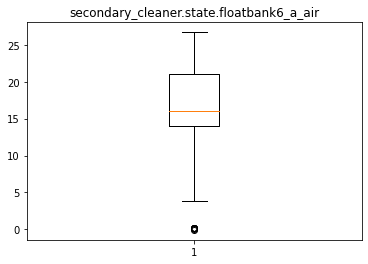

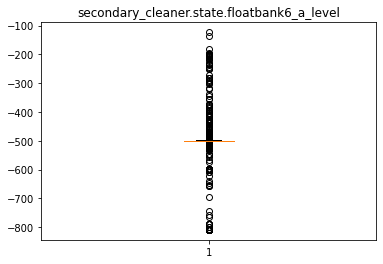

In [14]:
for col in list_column:
    plt.boxplot(df_test[col])
    plt.title(col)
    plt.show()

In [15]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5290.000000,5290.000000,5290.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.841912,8.682999,7.266339,1.383662,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.010885,3.070659,0.610219,0.643251,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.133336,6.489590,6.890000,0.907876,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.112236,10.027485,7.600000,1.797698,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


В данных было немного пропусков, которые были заполнены медианным значением по столбцу.<br>
Распределение данных довольно странное. В некоторых столбцах, как в обучающей, так и в тестовой выборке, большинство значений сосредоточены около одного, а остальные являются вбросами.<br>

### Расчёт эффективности

In [16]:
def recovery(C, F, T):
    return (C * (F - T)) / (F * (C - T)) * 100

In [17]:
mean_absolute_error(df_train['rougher.output.recovery'], recovery(
    df_train['rougher.output.concentrate_au'],
    df_train['rougher.input.feed_au'],
    df_train['rougher.output.tail_au']
))

9.73512347450521e-15

Эффективность в обучающей выборке рассчитана верна, погрешность составляет 10^(-15), что крайне мало

In [18]:
list_unavaible = []
for col in df_train.columns:
    if col not in df_test.columns:
        list_unavaible.append(col)
print(*list_unavaible, sep='\n')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке неизвестны выходные параметры после этапов.

### Предобработка данных

In [19]:
def del_noise(df, column):
    qu75 = np.array(df[column].quantile(0.75))
    qu25 = np.array(df[column].quantile(0.25))
    
    top = qu75 + 1.5 * (qu75 - qu25)
    botton = qu25 - 1.5 * (qu75 - qu25)
    
    index_noise = []
    
    for i in range(len(df[column])):
        if df[column][i] >= top or df[column][i] <= botton:
            index_noise.append(i)
            
    return index_noise

In [20]:
list_index_noise = []
res_set = set()
for df in [df_train, df_test, df_full]:
    temp = df.columns
    temp = temp.drop('date')
    for column in temp:
        res_set = res_set.union(set(del_noise(df, column)))
    res = list(res_set)
    res.sort()
    list_index_noise.append(res)

In [21]:
print('Количество строк для удаления в df_train', len(list_index_noise[0]))
print('Количество строк для удаления в df_test', len(list_index_noise[1]))
print('Количество строк для удаления в df_full', len(list_index_noise[2]))

Количество строк для удаления в df_train 12065
Количество строк для удаления в df_test 12204
Количество строк для удаления в df_full 17962


Если в каждом столбце удалять вбросы, то мы удалим больше половины данных, поэтому вбросы придётся оставить

## Анализ данных

In [22]:
stages = ['rougher', 'primary_cleaner', 'final']
parametrs = ['concentrate_ag', 'concentrate_pb', 'concentrate_sol', 'concentrate_au']

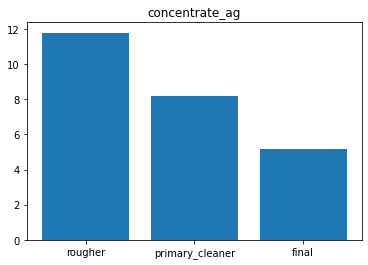

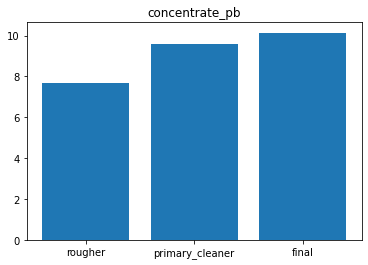

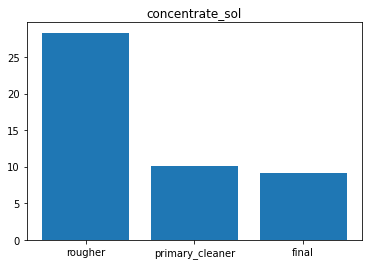

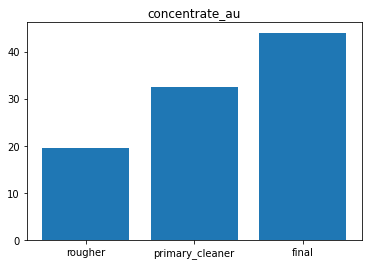

In [23]:
for param in parametrs:
    temp = []
    for stage in stages:
        name = stage + '.output.' + param
        temp.append(df_train[name].mean())
    plt.bar(stages, temp)
    plt.title(param)
    plt.show()

Как и ожидалось, концентрация золота с каждым разом растёт, на финальном этапе концентрация в два раза больше чем после начального.<br>
Концентрация других вещест, кроме свинца падает.

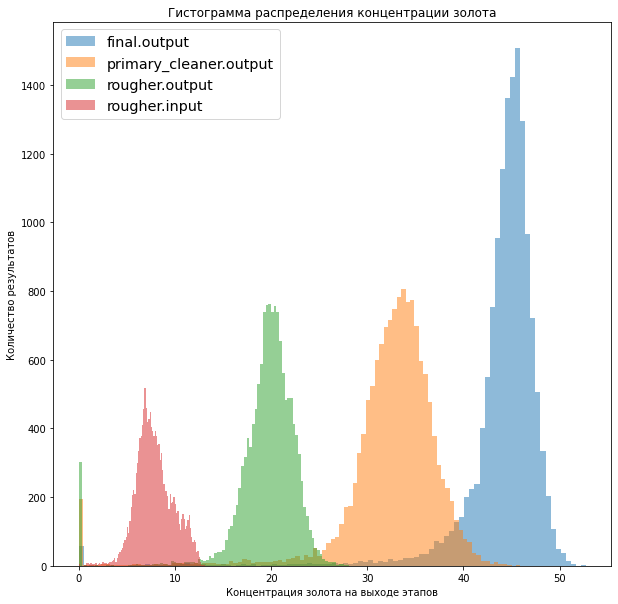

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

ax.hist(df_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
ax.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
ax.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)
ax.hist(df_train['rougher.input.feed_au'], bins=100, label = 'rougher.input', alpha=.5)
plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

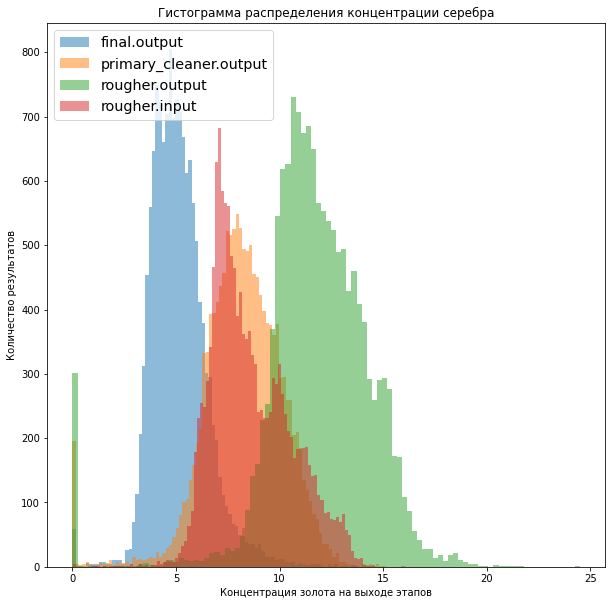

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

ax.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
ax.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
ax.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)
ax.hist(df_train['rougher.input.feed_ag'], bins=100, label = 'rougher.input', alpha=.5)
plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

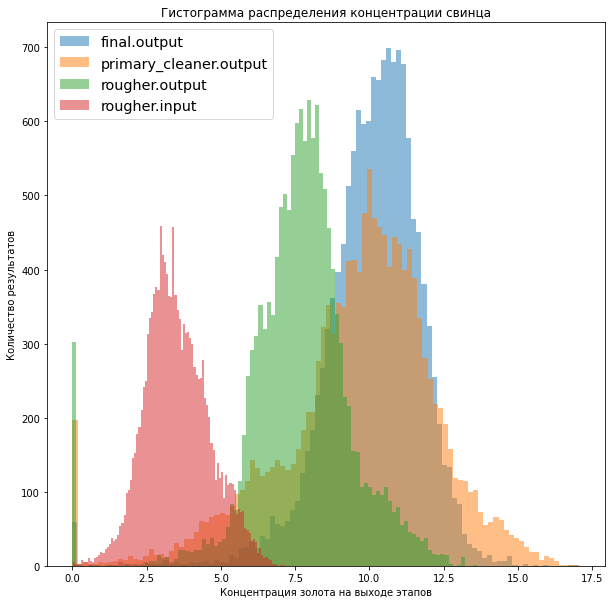

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

ax.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
ax.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
ax.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)
ax.hist(df_train['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)
plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")
plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

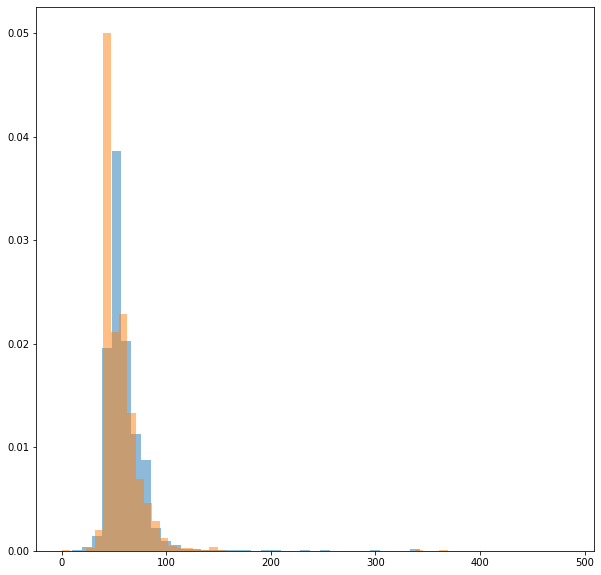

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df_train['rougher.input.feed_size'], bins=50, density=True, alpha=0.5)
ax.hist(df_test['rougher.input.feed_size'], bins=50, density=True, alpha=0.5)
plt.show()

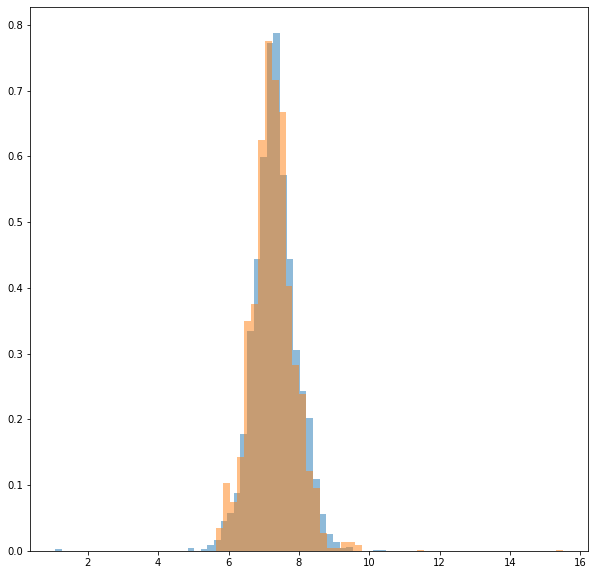

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df_train['primary_cleaner.input.feed_size'], bins=50, density=True, alpha=0.5)
ax.hist(df_test['primary_cleaner.input.feed_size'], bins=50, density=True, alpha=0.5)
plt.show()

Размер гранул в обоих выборках распределены одинаково, при этом, можно заметить что при первичной очистке размер гранул распределён нормально

In [29]:
final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + 
                                      df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'] +
                                      df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (df_train['primary_cleaner.output.concentrate_au'] + 
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'] +
                                                df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + 
                                        df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'] +
                                        df_train['rougher.output.concentrate_sol'])

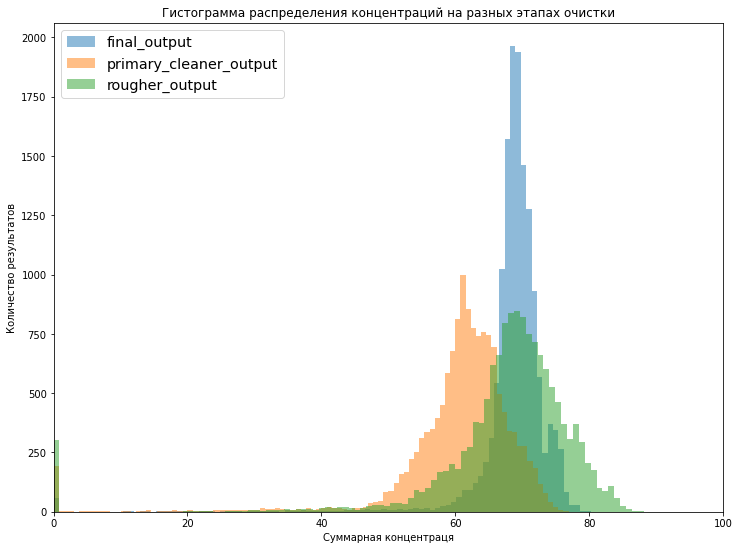

In [30]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

На грфике видны пике в нуле, рассмотрим подробнее эти пики

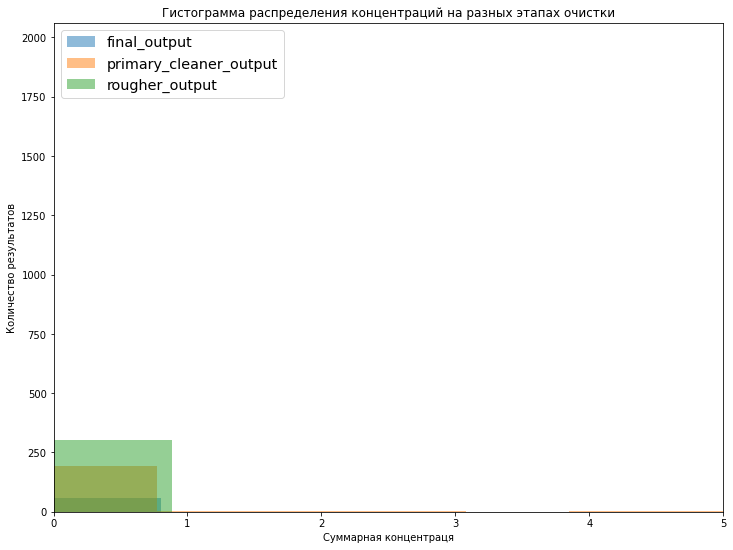

In [31]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 5])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Удалим строки строки, составляющие этот пик

In [32]:
for param in parametrs:
    for stage in stages:
        name = stage + '.output.' + param
        df_train = df_train.drop(df_train[df_train[name] < 1].index)

Данные обработаны

Вбросы удалены

В результате анализа были изучены:<br><br>
-Концетрации основных веществ на разных этапах очистки.<br>
-Размер гранул тестовой и обучающей выборки.<br>
-Суммарная концентрация веществ.<br>

Аномалии были удалены. Данные готовы к обучению.

## Модель

Для обучения модели, тестовая и обучающая выборки должны иметь одиннаковые столбцы

In [33]:
features_columns = df_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)

In [34]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(df_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = df_train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения всех столбцов из feateures в столбцах тестовой выборки
print(set(train_features_final.columns) - set(df_test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.output.recovery', 'primary_cleaner.output.tail_pb', 'final.output.recovery', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'rougher.output.tail_ag', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_sol', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_au', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_pb', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_ag', 'final.output.tail_ag', 'final.output.tail_au', 'rougher.output.concentrate_au', 'date', 'rougher.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_ag', 'final.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_pb', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 'secondary_clea

In [35]:
train_target_final = df_train['final.output.recovery']
train_target_rougher = df_train['rougher.output.recovery']

In [36]:
test_features = df_test.set_index('date')
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [37]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_a_air', 'primary_cleaner.state.floatbank8_b_level', 'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_a_air', 'secondary_cleaner.state.floatbank2_b_air', 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank6_a_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'secondary_cleaner.state.floatbank3_b_air', '

In [38]:
def sMAPE(y_true, y_predict):
    n = y_true.shape[0]
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    res = (2 * np.abs(y_true - y_predict) / np.abs(y_true + y_predict)).sum() * 100 / n
    return res

In [39]:
def final_sMAPE(rougher, final):
    res = 0.25 * rougher + 0.75 * final
    return res

In [40]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

Функция расчета sMape

Для задачи регрессии рассмотрим:<br>
-Дерево решений<br>
-Линейную регрессию<br>
-Регрессия Ridge

In [41]:
regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.23232557470596235
Mean MAE from CV of LinearRegression = -7.236457253482008


In [42]:
regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

print()
clf = GridSearchCV(regressor, hyperparams, scoring=sMAPE_scorer)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("sMAPE score for this parametrs")
print()
print(clf.best_score_)
print()


Best parameters set found on development set:

{'alpha': 0.1, 'solver': 'sparse_cg'}

sMAPE score for this parametrs

-10.806364380148299



In [43]:
regressor = DecisionTreeRegressor ()
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'max_depth':max_depth_list, 'random_state':[123]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams, scoring=sMAPE_scorer)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("sMAPE score for this parametrs")
print()
print(clf.best_score_)
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'max_depth': 2, 'random_state': 123}

sMAPE score for this parametrs

-9.241734797961263



In [44]:
df_full = df_full.set_index('date')
rougher_recovery_real = df_full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = df_full.loc[test_features_final.index,'final.output.recovery']
median_rougher_recovery = df_full['rougher.output.recovery'].median()
median_final_recovery = df_full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE1 = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE1 * 0.75)

sMAPE для медианной константной модели 9.165307584396805


In [45]:
model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',final_sMAPE(sMAPE(rougher_recovery_real, rougher_recovery_predicted), sMAPE(final_recovery_real, final_recovery_predicted)))

model = Ridge(alpha=0.1, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',final_sMAPE(sMAPE(rougher_recovery_real, rougher_recovery_predicted), sMAPE(final_recovery_real, final_recovery_predicted)))

model = DecisionTreeRegressor(max_depth=2, random_state=123)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',final_sMAPE(sMAPE(rougher_recovery_real, rougher_recovery_predicted), sMAPE(final_recovery_real, final_recovery_predicted))) 


sMAPE для линейной регресии 9.285078884019125
sMAPE для регресии Ridge 9.346943999055942
sMAPE для DecisionTreeRegressor 9.826288280681814


Лучше всего себя показало линейная регрессия, но она не смогла превзойти константную модель

## Вывод

В ходе проекта был проведён анализ данных, найденные аномалии были обработаны.<br>
Также была обучена модель, но она оказалась неэффективной. Это может быть связанно с изначальным разбиением данных или необходимы другие модели для более качественного предсказания

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке